# 6장. R 기초와 데이터 마트

## 2. R 언어와 문법

### (1) 벡터
- 하나의 스칼라값, 혹은 하나 이상의 스칼라 원소들을 갖는 단순한 형태의 집합. 동일한 자료형을 갖는 값들의 집합!
- 벡터 생성함수 : c(), seq(), rep()

### (2) 행렬(Matrix)
- 한 가지 유형의 스칼라만 사용 가능
- 행렬 생성함수 : matrix(data, nrow, ncol, byrow = FALSE, dimnames = NULL)
  - ncol : 열의 수. R은 기본적으로 열을 우선으로 값들을 채우는 방향으로 입력됨
  - byrow = FALSE : FALSE일 경우 열 우선으로, TRUE일 경우 행 우선으로

In [1]:
# 행렬
m <- matrix(c(1, 2, 3, 4, 5, 6), ncol = 2)
m

1,4
2,5
3,6


In [2]:
# 이미 만들어진 행렬에는 dimnames()를 사용해 행과 열 이름을 부여할 수 있음
dimnames(m) <- list(c("t1", "t2", "t3"), c("a1", "a2"))
m

,a1,a2
t1,1,4
t2,2,5
t3,3,6


In [3]:
# rbind() : 기존의 행렬에 row 추가
# cbind() : 기존의 행렬에 column 추가
m <- matrix(c(1, 2, 3, 4, 5, 6), ncol = 2)
r1 <- c(10, 10)
rbind(m, r1)

,1,4
,2,5
,3,6
r1,10,10


### (3) 데이터 프레임

In [4]:
# 데이터 프레임 생성
a1 <- c(100, 200, 300)
b1 <- c("a", "b", "c")
c1 <- c(FALSE, FALSE, FALSE)
D <- data.frame(income = a1, car = b1, marriage = c1)
D

income,car,marriage
<dbl>,<chr>,<lgl>
100,a,FALSE
200,b,FALSE
300,c,FALSE


### (4) 배열(Array)

In [5]:
# 배열(행렬(matrix)이 2차원 데이터라면, 배열(array)은 다차원 데이터)
array(1:12, dim = c(3, 4))  # (3 x 4) 차원 배열

1,4,7,10
2,5,8,11
3,6,9,12


In [6]:
# (2 x 2 x 3) 차원의 배열로 생성 가능 1
x <- array(1:12, dim = c(2, 2, 3))
x

, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    7
[2,]    6    8

, , 3

     [,1] [,2]
[1,]    9   11
[2,]   10   12

In [7]:
# (2 x 2 x 3) 차원의 배열로 생성 가능 2
coordinates <- array(1:12, dim = c(3, 4))
dim(coordinates) <- c(2, 2, 3)       # 차원 변경
coordinates

, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    7
[2,]    6    8

, , 3

     [,1] [,2]
[1,]    9   11
[2,]   10   12

### (5) 리스트
- 서로 다른 데이터 유형을 담을 수 있음
- (키, 값) 형태의 데이터를 담는 연관 배열

In [8]:
x <- list(name = "kimDoHyune", height = 182)
x

$name
[1] "kimDoHyune"

$height
[1] 182

## 3. 외부 데이터 불러오기

### (1) csv 파일 불러오기

In [ ]:
read.csv("D:/DATA/traffic_death.csv", header = T)      # header = T(TRUE) 옵션을 이용하여 csv 파일의 첫 줄을 변수명으로 지정

### (2) txt 파일 불러오기

In [ ]:
read.table("D:/DATA/traffic_death.txt", header = T, Sep = ";")   # Sep = ";" 옵션으로 데이터가 ;로 구분된 데이터 파일임을 지정해주는 것, header = F(FALSE)가 기본값인 게 read.csv와는 차이점

### (3) 엑셀 파일 불러오기
- RODBC 패키지를 이용하여 불러오는 방법
- But, 엑셀 파일을 csv 파일로 저장하여 위의 csv 파일 불러오기 방법으로 불러오는 것을 추천

In [ ]:
install.packages("RODBC")
library(RODBC)
new <- odbcConnectExcel("D:/DATA/traffic_death")
data <- sqlFetch(new, "traffic_death")
data

## 4. R의 기초 함수

### (1) 수열 생성

In [9]:
rep(1, 3)   # rep() 함수 : 1번째 인수를 2번째 인수만큼 반복하는 숫자 벡터

[1] 1 1 1

In [10]:
rep(2:5, 3)

[1] 2 3 4 5 2 3 4 5 2 3 4 5

In [11]:
seq(1, 3)   # seq 함수 : 1번째 인수부터 2번째 인수까지 1씩 증가하는 숫자 벡터

[1] 1 2 3

In [12]:
seq(1, 11, by = 2)   # by = n 옵션으로 n씩 증가하는 수열 생성

[1]  1  3  5  7  9 11

In [13]:
seq(1, 11, length = 7)   # length = m 옵션으로 전체 수열의 개수가 m개가 되도록 자동적으로 증가하는 수열 생성

[1]  1.000000  2.666667  4.333333  6.000000  7.666667  9.333333 11.000000

### (2) 기초적인 행렬 계산

In [14]:
a <- 1:10
a

[1]  1  2  3  4  5  6  7  8  9 10

In [15]:
a + a

[1]  2  4  6  8 10 12 14 16 18 20

In [16]:
a - a

[1] 0 0 0 0 0 0 0 0 0 0

In [17]:
a / a

[1] 1 1 1 1 1 1 1 1 1 1

In [18]:
a <- c(2, 7, 3)     # (1 x 3) 행렬
z <- a %*% t(a)     # t() : 전치행렬 생성, %*% 연산 : 두 행렬의 행렬 곱(element-wise product)
z                   # (3 x 3) 행렬 생성

4,14,6
14,49,21
6,21,9


In [19]:
a * a

[1]  4 49  9

In [20]:
# *로 스칼라 곱의 결과를 얻을 수 있음
A <- matrix(c(23, 41, 12, 35, 67, 1, 24, 7, 53), nrow = 3)
A

23,35,24
41,67,7
12,1,53


In [21]:
5 * A

115,175,120
205,335,35
60,5,265


In [22]:
# solve()로 역행렬 계산 가능
solve(A)

-0.35743822,0.18466969,0.13746848
0.21069087,-0.09389813,-0.08300555
0.07695411,-0.04004034,-0.01069087


### (추가) 기초통계 정리
- 변동계수 : 표준편차/평균, 측정단위가 서로 다른 데이터를 비교할 때, 변동계수 크다(=편차가 크다)
- IQR(Interquartile Range; 사분위수 범위) : 3사분위수 - 1사분위수
- 왜도(skewness) : '0'이면 정규분포, 0보다 크면 왼쪽으로 치우친 분포, 분포모양의 비대칭 정도
- 첨도(kurtosis) : '3'보다 크면 정규분포보다 뾰족한 모양, 뾰족한 정도

- describe()는 install.packages('psych')에 있음

## 5. R 데이터 핸들링

In [23]:
# R은 객체지향 언어
# 벡터형 변수
b <- c("a", "b", "c")
b

[1] "a" "b" "c"

In [24]:
b[2]   # n번째 원소

[1] "b"

In [25]:
b[-3]  # -를 붙이고 숫자를 지정하면 n번째 제외하고 가져옴

[1] "a" "b"

In [26]:
b[c(1, 2)]

[1] "a" "b"

### (1) 반복문과 조건문

In [27]:
# for 반복문
a <- c()   # 아무런 값도 포함되지 않는 a 벡터
for (i in 1:9){
  a[i] = i * i
}
a

[1]  1  4  9 16 25 36 49 64 81

In [28]:
# while 반복문
x = 1
while (x < 5) {
  x = x + 1
  print(x)
}

[1] 2
[1] 3
[1] 4
[1] 5


In [29]:
# if ~ else 조건문
# ifelse(조건문, 조건을 만족할 때 반환하는 값, 조건을 만족하지 않을 때 반환하는 값)
gender <- c("m", "f", "m", "f", "m")
gender <- ifelse(gender == "f", 0, 1)
gender

[1] 1 0 1 0 1

### (2) 사용자 정의 함수

In [30]:
foruse <- function(a){
  isum <- 0
  for (i in 1:a){
    isum = isum + i
  }
  print(isum)
}

foruse(3)

[1] 6


### (3) 기타 유용한 기능들

In [31]:
# paste() : 입력받은 문자열들을 하나로 붙여줌
number <- 1:5
alphabet <- c("a", "b", "c")
paste(number ,alphabet)

[1] "1 a" "2 b" "3 c" "4 a" "5 b"

In [32]:
paste(number, alphabet, sep = ' to the ')  # sep 옵션으로 붙이고자 하는 문자열들 사이에 삽입 가능

[1] "1 to the a" "2 to the b" "3 to the c" "4 to the a" "5 to the b"

In [33]:
# substr() : 부분 문자열 추출
country <- c("korea", "Japan")
substr(country, 1, 2)    # 1번 글자부터 2개의 글자만 추출

[1] "ko" "Ja"

In [34]:
# as. : 자료형 데이터 구조 변환
# as.data.frame(x) : 데이터 프레임 형식으로 변환
# as.list(x) : 리스트 형식으로 변환
# as.matrix(x) : 행렬 형식으로 변환
# as.vector(x) : 벡터 형식으로 변환
# as.factor(x) : factor 형식으로 변환
as.integer(3.14)     # 실수형 벡터를 정수형 벡터로 변환

[1] 3

In [35]:
as.numeric("foo")   # "foo"는 숫자형 자료가 아니므로 결측치인 'NA'가 출력되며 경고문이 발생

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

In [36]:
as.numeric(FALSE)    # 논리값인 TRUE와 FALSE를 수치형으로 변환할 때는 각각 0, 1로 바꿈

[1] 0

In [37]:
as.logical(0.45)

[1] TRUE

In [38]:
# as.Date() : 문자열을 날짜로 변환
as.Date("2018-01-13")

[1] "2018-01-13"

In [39]:
as.Date("01/13/2018", format = "%m/%d/%Y")    # as.Date는 기본적으로 문자열이 yyyy-mm-dd로 가정. 'format' 옵션으로 입력되는 날짜의 형식을 지정해줘야 함

[1] "2018-01-13"

In [40]:
format(Sys.Date())    # 현재 날짜 반환

[1] "2021-11-01"

In [41]:
format(Sys.Date(), format = "%m/%d/%Y")      # 'format' 옵션으로 yyyy-mm-dd 형식 대신 mm/dd/yyyy 형식으로 문자열 출력

[1] "11/01/2021"

In [42]:
format(Sys.Date(), "%a")      # 현재 요일 출력

[1] "Mon"

In [43]:
format(Sys.Date(), "%b")      # 현재 월 출력

[1] "Nov"

In [44]:
format(Sys.Date(), "%y")      # 현재 두 자리 숫자로 연도 출력

[1] "21"

In [45]:
format(Sys.Date(), "%Y")      # 현재 네 자리 숫자로 연도 출력

[1] "2021"

## 6. R 그래픽 기능

### (1) 산점도 그래프

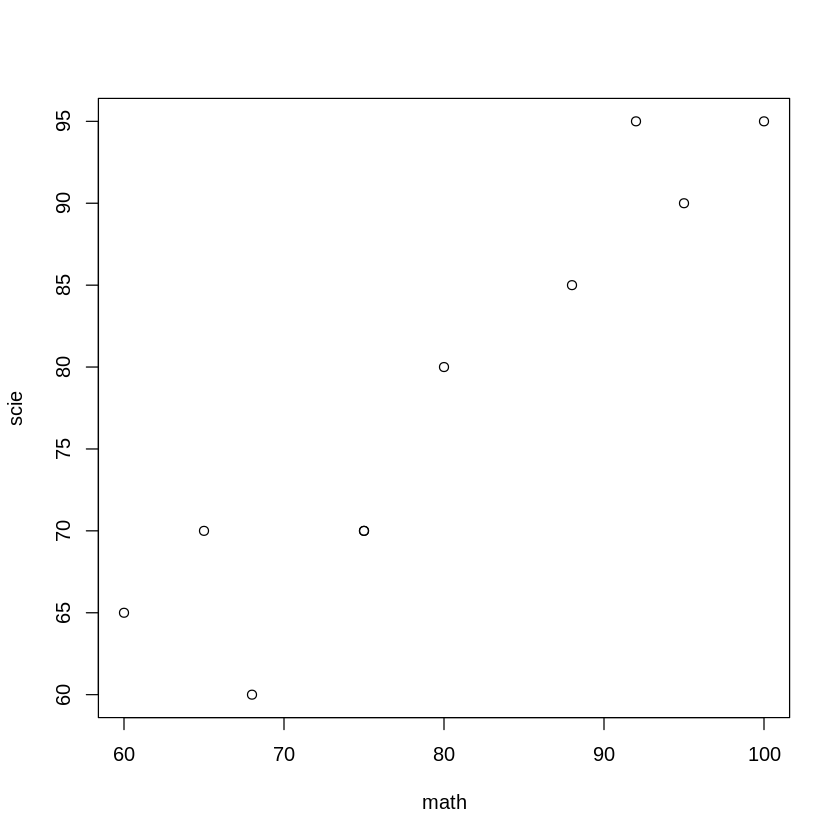

In [46]:
math <- c(95, 65, 80, 92, 60, 75, 88, 100, 75, 68)
scie <- c(90, 70, 80, 95, 65, 70, 85, 95, 70, 60)
plot(math, scie)

### (2) 산점도 행렬
- 여러 가지 변수들에 대해 각각의 산점도를 한눈에 살펴볼 수 있는 확정된 산점도 행렬

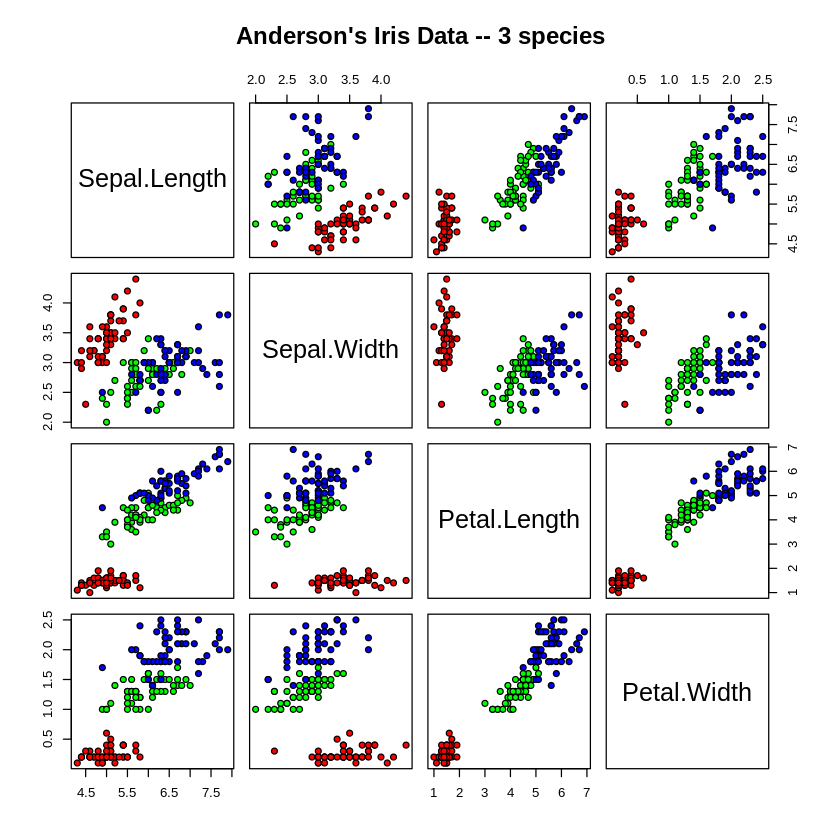

In [47]:
# pairs()를 이용해 범주(그룹)를 색깔로 구분하여 산점도 행렬 그리기
# main : 최상단에 제목 표기
# pch : 점의 모양
# bg = "색상1, 색상2, 색상3"[컬럼1, 컬럼2, 컬럼3] : species에 따라 다른 색상 부여
# unclass(iris$Species) : iris의 Species 데이터를 분할(1, 2, 3의 값으로)
pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species", pch = 21, bg = c("red", "green", "blue")[unclass(iris$Species)])

### (3) 히스토그램과 상자그림
- hist() 함수의 다양한 옵션
- breaks : 계급구간의 수 설정
- probability = T : 상대도수 히스토그램으로 출력
- ylim = c(0, 0.04) : 그래프 y축 설정

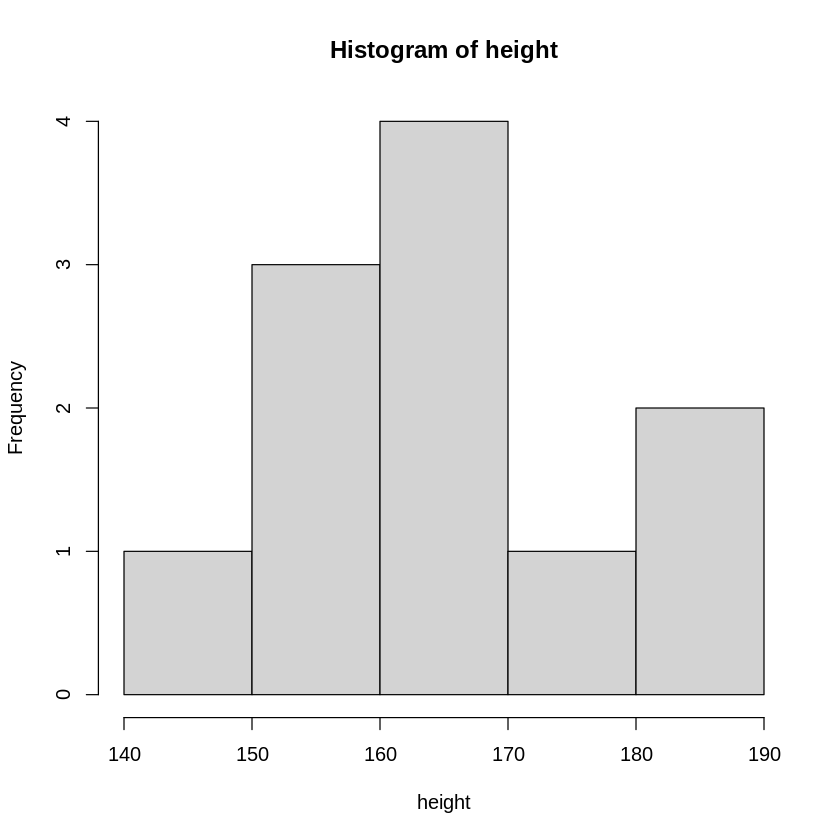

In [48]:
height <- c(182, 160, 165, 170, 163, 160, 181, 166, 159, 145, 175)
hist(height)

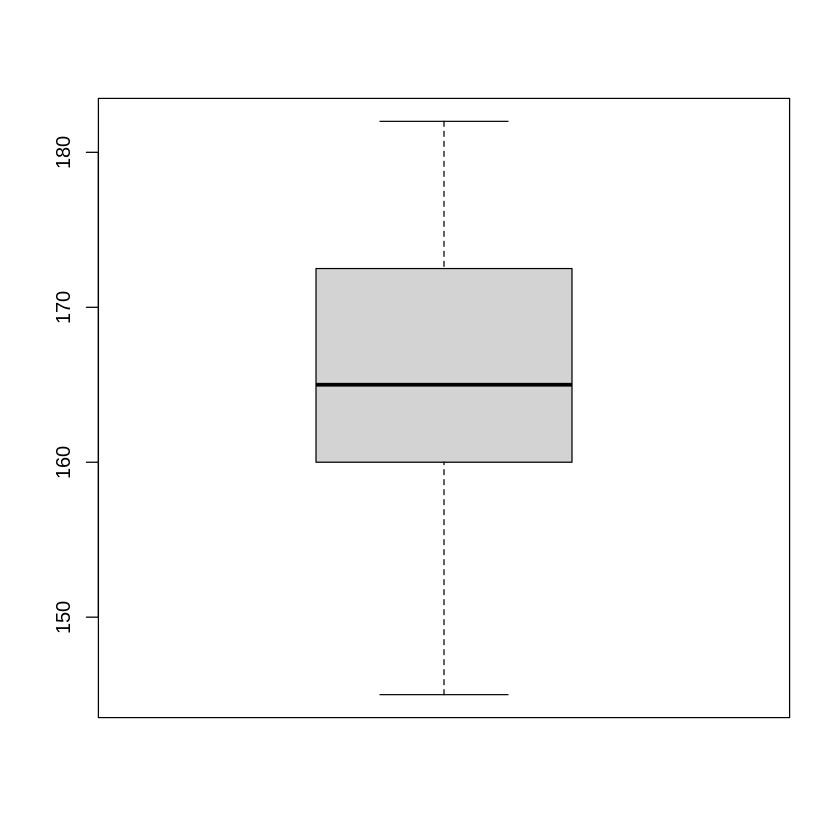

In [49]:
boxplot(height)